# Milestone Project 1: Food Vision Big
I will use the hosted runtime just because I want to run faster training and use mixed precision training.

## Check GPU
And ofcourse in his fashion he has to write 1000 pages on his feelings and to explain it to the retards. Google colab offers GPU's' but just for a tiny bit


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-072cae05-c04f-f1b6-e69d-865aeca4b42e)


## Get helper functions

Blah blah blah. HE just loves to write useless shit. Jesus, we have been taking the course for like 40 hours at this point WE KNOW that we can find the fucking helper_function and use it. You wrote it in the last module, and the one before that, and the one before that. And even numerous times in eacch module

Link: 

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-01-21 07:13:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-21 07:13:22 (116 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *

## Use tensorflow dataset in this module

Can be useful to read the guide on the page : https://www.tensorflow.org/api_docs/python/tf/data/Dataset

And : https://www.tensorflow.org/datasets/overview

In [ ]:
# get tensorflow dataset
import tensorflow_datasets as tfds

In [ ]:
# List available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print('food101' in datasets_list)

True


In [ ]:
# Load in the data (takes 5-6 minutes in google colab)
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteII5MLJ/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteII5MLJ/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the data more (101 food dataset)

* Class names 
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g. are they one-hot-encoded or are they label encoded.
* Do they match up with the class names?

In [ ]:
train_data1 = train_data.take(1)
for image, label in train_data1:
  print(image.shape, label)

(512, 512, 3) tf.Tensor(90, shape=(), dtype=int64)


In [ ]:
# Features of food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
# Get the class names
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Take on example of the train data
train_one_sample = train_data.take(1) #  Literally takes one example

In [ ]:
# What does it look like? I did it above
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape},
  Image datatype: {image.dtype},
  Target class from Food101: {label},
  Class name (str form):{class_names[label.numpy()]}""")


  Image shape: (512, 512, 3),
  Image datatype: <dtype: 'uint8'>,
  Target class from Food101: 81,
  Class name (str form):ramen


In [ ]:
# What does our image from TFDS's Food101 look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[242, 254, 252],
        [241, 253, 251],
        [240, 252, 250],
        ...,
        [241, 211, 101],
        [242, 212, 102],
        [245, 215, 105]],

       [[240, 252, 250],
        [240, 252, 250],
        [239, 251, 249],
        ...,
        [245, 215, 105],
        [242, 212, 102],
        [240, 210, 100]],

       [[238, 250, 248],
        [238, 250, 248],
        [238, 250, 248],
        ...,
        [250, 218, 107],
        [243, 211, 100],
        [238, 206,  95]],

       ...,

       [[ 82,  81,  77],
        [ 83,  82,  78],
        [ 82,  81,  77],
        ...,
        [126, 128, 127],
        [135, 137, 136],
        [139, 141, 140]],

       [[ 82,  79,  74],
        [ 82,  79,  74],
        [ 81,  78,  73],
        ...,
        [209, 209, 209],
        [217, 217, 217],
        [215, 215, 215]],

       [[ 78,  75,  70],
        [ 77,  74,  69],
        [ 76,  73,  68],
        ...,
        [187, 187, 18

In [ ]:
# What are the min and max
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an image from tensorflow dataset

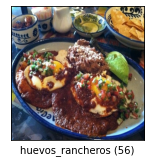

In [ ]:
# Plot image tensor
fig = tfds.show_examples(train_one_sample, ds_info)

(-0.5, 511.5, 511.5, -0.5)

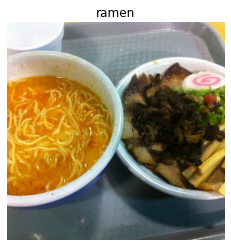

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

## Create preprocessing functions for our data
Neural network perform best when data is in a certain way (e.g. batched, normalized, etc.)

Not all data from tensordata is that. You have to make your own functions to do that for you

What we know about our data:
* In uint8 datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 and 255)

What we know models like: (Is he really going to write what they like? He literally wrote it above with exception of it being in float)
* Float datatype
* Same shape
* normalized
* In batches

We will use EfficientNet so we wont rescale data

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from uint8 --> float32 and reshapes the image to (img_shape, img_shape)  
  """
  image = tf.image.resize(image, [img_shape, img_shape])
  return tf.cast(image, tf.float32), label

In [ ]:
# Preprocess a single sample and check the output
preprocessed_img = preprocess_img(image, label)[0]
print(f'Image before preprocessing:\n {image[:2]}..., \nShape: {image.shape}, \nDatatype: {image.dtype}\n')
print(f'Image before preprocessing:\n {preprocessed_img[:2]}..., \nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}\n')

Image before preprocessing:
 [[[242 254 252]
  [241 253 251]
  [240 252 250]
  ...
  [241 211 101]
  [242 212 102]
  [245 215 105]]

 [[240 252 250]
  [240 252 250]
  [239 251 249]
  ...
  [245 215 105]
  [242 212 102]
  [240 210 100]]]..., 
Shape: (512, 512, 3), 
Datatype: <dtype: 'uint8'>

Image before preprocessing:
 [[[240.4847  252.4847  250.4847 ]
  [238.42857 250.42857 248.42857]
  [238.29082 249.86224 248.07652]
  ...
  [251.4235  219.20923 107.78071]
  [246.3571  216.3571  106.3571 ]
  [241.92346 211.92346 101.92346]]

 [[237.07143 249.07143 247.07143]
  [238.      250.      248.     ]
  [240.14285 250.14285 249.14285]
  ...
  [248.22957 215.28569 101.85716]
  [250.99489 218.99489 106.27042]
  [243.07126 211.07126 100.07126]]]..., 
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>



## Batch and prepare datasets

https://www.tensorflow.org/guide/data <- extra stuff. Read through.

In general read through the pipeline tensorflow documentaion. They talk about datasets in general. All types (except for pointclouds ofc)

In [ ]:
# Map preprocessing function to training (parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle it again just to be sure
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE) # Can use.cache ath the end here

In [ ]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

> "Hey, TensorFlow, map this preprocessing function across our training dataset, then shuffle a number of elements (1000) and then batch them together and finally sure you prepare new batches whilst the model is looing through the current batch"

## Create modelling callback

Training can be really slow, so having some sort of callbacks such that you can underway save weights etc can be helpful. Maybe the model is doing poorly and you exit the session and load the weights and analyze from that point on etc

Anyways the callbacks I will make are:
* Early stopping
* Tensorboard (already made)
* Checkpoint callback
* Possibly learning rate reduction

In [ ]:
# Create tensorboard callback idiot, just import it and you already have done it
# Create modelcheckpoint callback to save a models progress
checkpoint_path = 'model_checkpoints/cp.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor='val_accuracy',
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)


## Mixed precision 

First and foremost, for a deeper understanding of mixed precision training check out the tensorflow guide for mixed precision:
https://www.tensorflow.org/guide/mixed_precision

Here we have tensorflow v 2.5.0 so we have to downgrade it to use it - wrong, it is 2.7.0. It was in the local runtime I have 2.5.0

This function is very good because we can mix between 16bit and 32bit and that reduces training.

In [ ]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [ ]:
# Just to test if I have to downgrade the tensorflow
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
print(tf.__version__)

2.7.0


Maybe it is fixed in 2.7.0. We will test it out

In [ ]:
input_shape = (224, 224, 3)
# Create functional model
inputs = tf.keras.layers.Input(shape=input_shape, name='input_layer')
# Here is where you would put data augmentation
x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(len(class_names))(x)
outputs = tf.keras.layers.Activation('softmax', dtype=tf.float32, name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 output_layer (Activation)   (None, 101)               0         
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
___________________________________________

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 output_layer (Activation)   (None, 101)               0         
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
___________________________________________

## Checking layer dtype plicies (are we using mixed precision?)

In [ ]:
for layer in model.layers:
  print(layer.dtype, layer.name, layer.dtype_policy)

float32 input_layer <Policy "float32">
float32 efficientnetb0 <Policy "mixed_float16">
float32 global_average_pooling2d_2 <Policy "mixed_float16">
float32 dense_1 <Policy "mixed_float16">
float32 output_layer <Policy "float32">


Going through above we see:
* Layer name: the human readable name of a particular layer
* Layer dtype: the datatype a layer stores its variables in
* Layer dtype_policy: the data type policy a layer compues on its variables with

In [ ]:
# Check efficientnet layers
for layer in model.layers[1].layers[:20]:
  print(layer.name, layer.dtype, layer.dtype_policy)

input_1 float32 <Policy "float32">
rescaling float32 <Policy "mixed_float16">
normalization float32 <Policy "mixed_float16">
stem_conv_pad float32 <Policy "mixed_float16">
stem_conv float32 <Policy "mixed_float16">
stem_bn float32 <Policy "mixed_float16">
stem_activation float32 <Policy "mixed_float16">
block1a_dwconv float32 <Policy "mixed_float16">
block1a_bn float32 <Policy "mixed_float16">
block1a_activation float32 <Policy "mixed_float16">
block1a_se_squeeze float32 <Policy "mixed_float16">
block1a_se_reshape float32 <Policy "mixed_float16">
block1a_se_reduce float32 <Policy "mixed_float16">
block1a_se_expand float32 <Policy "mixed_float16">
block1a_se_excite float32 <Policy "mixed_float16">
block1a_project_conv float32 <Policy "mixed_float16">
block1a_project_bn float32 <Policy "mixed_float16">
block2a_expand_conv float32 <Policy "mixed_float16">
block2a_expand_bn float32 <Policy "mixed_float16">
block2a_expand_activation float32 <Policy "mixed_float16">


## Fit the feature extraction model

If our goal is to fine-tune a pretrained model, the general order of doing things is:

1. Build a feature extraction model (train a couple of output layers with base layers frozen)
2. Fine-tune some of the frozen layers

In [ ]:
# Fit the model
history = model.fit(train_data,
                    epochs=3,
                    validation_data=test_data,
                    validation_steps=(0.15*len(test_data)),
                    callbacks=[create_tensorboard_callback('Tensorboards', 'Milestone_project1'), model_checkpoint])

Saving TensorBoard log files to: Tensorboards/Milestone_project1/20220121-104707
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2368/2368 [==============================] - 184s 77ms/step - loss: 1.2394 - accuracy: 0.6799 - val_loss: 1.1182 - val_accuracy: 0.7004
Epoch 2/3
2368/2368 [==============================] - 182s 76ms/step - loss: 1.1080 - accuracy: 0.7122 - val_loss: 1.0832 - val_accuracy: 0.7059
Epoch 3/3
2368/2368 [==============================] - 185s 77ms/step - loss: 1.0201 - accuracy: 0.7330 - val_loss: 1.0506 - val_accuracy: 0.7151


In [ ]:
result_feature_extraction = model.evaluate(test_data)
result_feature_extraction

790/790 [==============================] - 52s 66ms/step - loss: 1.0721 - accuracy: 0.7099


[1.072143793106079, 0.7098613977432251]